# Automated pdl layer generation <a class="tocSkip"> 
This notebook explains a method to automatically generate the pdl layer based on the bone geometries

# imports

In [1]:
import numpy as np
import meshplot as mp
from pathlib import Path
import sys
sys.path.append('../')
import cargen

In [2]:
"""
DIRECTORIES:
"""
main_dir = Path('..')

# input and output paths
i_dir = main_dir / 'models'/ 'tooth'
o_dir = main_dir / 'output' 

# Remove all files inside output directory if it exists, otherwise create it
if o_dir.is_dir():
    for file in o_dir.iterdir():
        if file.is_file():
            file.unlink()
else:
    o_dir.mkdir(exist_ok=False)
    

In [3]:
"""
VALUES:

i_dim, o_dim = input and output dimension ( "mm" = millimeters, "m" = meters )
i_format = the format of the input surface mesh ( ".obj" , ".stl")
o_format = format you want the files to be save at ( ".obj" , ".stl" )
+ scroll down to calibrate the pdl generation parameters
"""
# dimensions 
i_dim  = "mm"     
o_dim  = "mm"

i_format = ".obj"
o_format = ".obj"

In [4]:
"""
NAMES & PATHS:
"""
# bones
bone_name = 'bone'
tooth_name  = 'tooth' 

# cartilages
pdl_name = 'pdl'

#bones 
clean_bone_name   = 'clean_' + bone_name  + '_'+ o_dim
clean_tooth_name  = 'clean_' + tooth_name + '_'+ o_dim

#cartilages
pdl_cart_name = pdl_name +'_cart_'+ o_dim
pdl_top_name  = pdl_name +'_top_' + o_dim

# input paths
bone_path  = str((i_dir/ bone_name).with_suffix(i_format))
tooth_path = str((i_dir/ tooth_name).with_suffix(i_format))

# output paths
#bones
clean_bone_path   = str((o_dir/ clean_bone_name).with_suffix(o_format))
clean_tooth_path  = str((o_dir/ clean_tooth_name).with_suffix(o_format))

#cartilage
pdl_cart_path  = str((o_dir/ pdl_cart_name).with_suffix(o_format))
pdl_top_path   = str((o_dir/ pdl_top_name).with_suffix(o_format))

# implementation

## read and clean up input

In [5]:
s1_vertices, s1_faces  = cargen.read_and_clean ( bone_path, i_dim )
s2_vertices, s2_faces  = cargen.read_and_clean ( tooth_path, i_dim ) 

number of triangles after cleaning 141516
number of triangles after cleaning 346552


In [6]:
frame = mp.plot( s1_vertices, s1_faces, c = cargen.mandible, shading = cargen.sh_false )
frame.add_mesh ( s2_vertices, s2_faces, c = cargen.tooth, shading = cargen.sh_false )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

1

## pdl layer

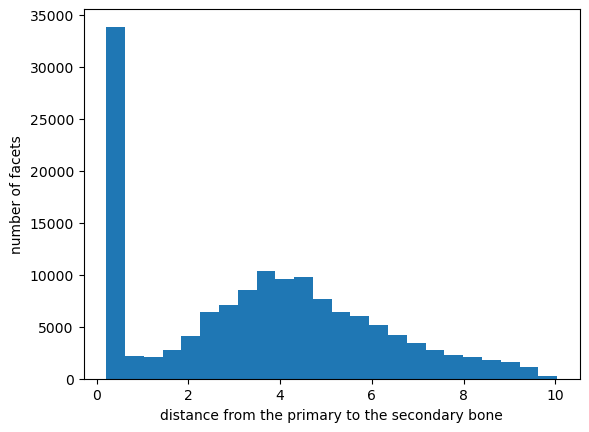

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

Base layer: max dihedral angle before smoothing is  0.72 radians ( 41.25 degrees).


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

Base layer: max dihedral angle after smoothing is  3.14 radians ( 179.91 degrees).


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

Quality control results for the base layer: 

- There are issues with these vertex indices [0, 1, 33, 34, 35, 250]
- Solution 1: To prevent this issue, decrease your 'param.smoothing_iteration' to  5
- Solution 2: By default the faulty triangles will be removed from the face index list 

faulty vertices & neighbouring triangles:


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

The pink triangles will be removed:


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

normal visualization of the fixed result:


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

Extruded layer: max dihedral angle before smoothing is  3.08 radians ( 176.47 degrees).


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.673631…

Extruded layer: max dihedral angle after smoothing is 3.04 radians ( 174.18 degrees).


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.673631…

Quality control results  for the extruded layer: 

- There are issues with these vertex indices [216, 217, 218]
- Solution 1: To prevent this issue, decrease your 'param.smoothing_iteration' to  0
- Solution 2: By default the faulty triangles will be removed from the face index list 
faulty vertices & neighbouring triangles:


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.673631…

The pink triangles will be removed:


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.673631…

normal visualization of the fixed result:


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.673631…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.673631…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.106391…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(26.925607…

pdl base area is:  234.53
mean pdl thickness is:  0.24
maximum pdl thickness is:  0.29


In [7]:
# set the parameters
param = cargen.Var()

# change the ones you like
param.gap_distance = 0.3
param.trimming_iteration = 1
param.smoothing_iteration_base = 10
param.smoothing_iteration_extruded_base = 3
param.thickness_factor = 1

# make it
pdl_vertices, pdl_faces, top_vertices, top_faces = cargen.get_pdl_layer(s1_vertices, s1_faces, 
                                                                           s2_vertices, s2_faces,
                                                                           param)

# reset the parameters to default values
param.reset()

## export results

### pdl

In [8]:
cargen.save_surface ( pdl_vertices, pdl_faces, o_dim, pdl_cart_path )
cargen.save_surface ( top_vertices, top_faces, o_dim, pdl_top_path )

### bones

In [9]:
cargen.save_surface ( s1_vertices, s1_faces, o_dim, clean_bone_path )
cargen.save_surface ( s2_vertices, s2_faces, o_dim, clean_tooth_path)

# voila!

In [10]:
frame = mp.plot( pdl_vertices, pdl_faces, c = cargen.organ,  shading = cargen.sh_false )
frame.add_mesh ( s1_vertices,  s1_faces,  c = cargen.mandible, shading = cargen.sh_false )
frame.add_mesh ( s2_vertices,  s2_faces,  c = cargen.tooth, shading = cargen.sh_false )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(24.755238…

2